# **K-Means & Agglomerative Clustering**

# **Import Library**

In [287]:
import sklearn.datasets as datasets
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator
import plotly.express as px
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

# **Data Pre-Processing**

## **Load Dataset**

In [288]:
# Load dataset
data = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv"
df = pd.read_csv(data)

# Preview the dataset
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [289]:
# Check shape of the dataset
df.shape

(225, 10)

In [290]:
# View summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


There is a total of 10 columns in the dataset: `Country`, `Other names`, `ISO 3166-1 alpha-3 CODE`, `Population`, `Continent`, `Total Cases`, `Total Deaths`, `Tot Cases//1M pop`, `Tot Deaths/1M pop`, and `Death percentage`. The dataset contains 1 missing (null) values.

In [291]:
# View the statistical summary of numerical variables
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


## **Data Cleaning**

In [292]:
df = df.rename(columns={
    'Tot\xa0Cases//1M pop': 'Total Cases/1M Population',
    'Tot\xa0Deaths/1M pop': 'Total Deaths/1M Population',
    'Death percentage': 'Death Percentage'
})

In [293]:
# Drop unused column
df = df.drop(columns=['Other names'])

In [294]:
# Check for missing values in dataset
df.isnull().sum()

,0
Country,0
ISO 3166-1 alpha-3 CODE,0
Population,0
Continent,0
Total Cases,0
Total Deaths,0
Total Cases/1M Population,0
Total Deaths/1M Population,0
Death Percentage,0


In [295]:
# Check for duplicate rows in dataset
df[df.duplicated(keep=False)]

,Country,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Total Cases/1M Population,Total Deaths/1M Population,Death Percentage


# **Exploratory Data Analysis**

In [296]:
fig = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE",
    color="Continent",  # Color by continent for better readability
    hover_name="Country",
    projection="natural earth",
    title="World Map of Countries by Continent"
)

fig.show()

The map highlights how countries are distributed across different continents, showing clear geographic clustering of regions such as Africa, Europe, Asia, and the Americas. It visually emphasizes the global spread of nations and helps identify continental groupings at a glance, which can be useful for further continent-based analysis.

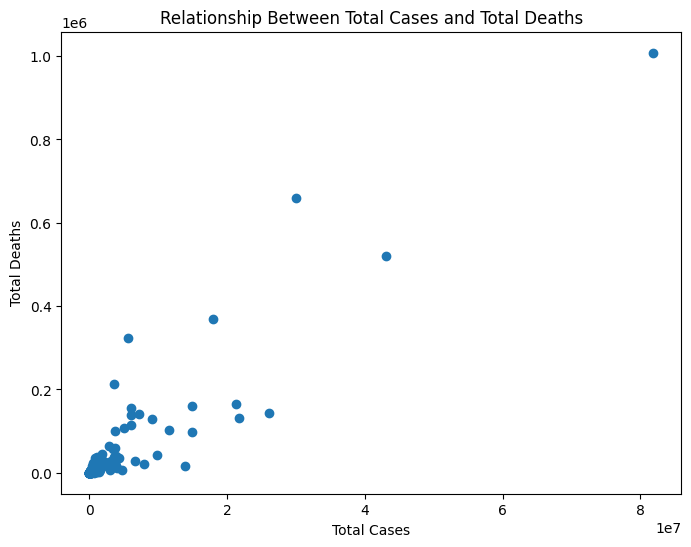

In [297]:
# Scatter plot
plt.figure(figsize=(8,6))

plt.scatter(df['Total Cases'], df['Total Deaths'])

# Titles and labels
plt.title('Relationship Between Total Cases and Total Deaths')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')

plt.show()

The scatter plot shows a clear positive relationship between total COVID-19 cases and total deaths across countries. Nations with higher case counts generally experienced higher death totals, with a few countries standing out as extreme outliers. This pattern suggests that overall case burden strongly influenced the severity of outcomes worldwide.

# **Encoding & Data Transformation**

## **Data Encoding**

In [298]:
# Show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Country': array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
        'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
        'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
        'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
        'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
        'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei ',
        'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
        'Cameroon', 'Canada', 'CAR', 'Caribbean Netherlands',
        'Cayman Islands', 'Chad', 'Channel Islands', 'Chile', 'China',
        'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
        'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia', 'Denmark',
        'Djibouti', 'Dominica', 'Dominican Republic',
        'Democratic Republic of the Congo', 'Ecuador', 'Egypt',
        'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
        'Eswatini', 'Ethiopia', 'Faeroe I

In [299]:
# Drop column 'Country' and 'ISO 3166-1 alpha-3 CODE' from df that used for modeling
df_model = df.iloc[:, 2:]

df_model.head()

,Population,Continent,Total Cases,Total Deaths,Total Cases/1M Population,Total Deaths/1M Population,Death Percentage
0,40462186,Asia,177827,7671,4395,190,4.313743
1,2872296,Europe,273870,3492,95349,1216,1.275058
2,45236699,Africa,265691,6874,5873,152,2.587216
3,77481,Europe,40024,153,516565,1975,0.382271
4,34654212,Africa,99194,1900,2862,55,1.915438


In [300]:
# Nominal Encoding
# Suppose you already fitted the encoder:
nominal_cols = ['Continent']
encoder = OrdinalEncoder()
df_model[nominal_cols] = encoder.fit_transform(df_model[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_model.sample(n = 5)

{'Continent': {'Africa': 0,
               'Asia': 1,
               'Europe': 2,
               'Latin America and the Caribbean': 3,
               'Northern America': 4,
               'Oceania': 5}}


,Population,Continent,Total Cases,Total Deaths,Total Cases/1M Population,Total Deaths/1M Population,Death Percentage
114,7034832,0.0,501738,6419,71322,912,1.279353
116,2655811,2.0,1030966,8907,388193,3354,0.863947
214,334400597,4.0,81839052,1008222,244734,3015,1.231957
177,17515750,0.0,85919,1965,4905,112,2.287038
99,60306185,2.0,14846514,159784,246186,2650,1.076239


## **Data Scaling**

In [301]:
# Scale dataset with standard scaler
# Numerical Columns
num_cols = ['Population', 'Total Cases', 'Total Deaths', 'Total Cases/1M Population', 'Total Deaths/1M Population', 'Death Percentage']

# Categorical Columns
cat_cols = ['Continent']

sc = StandardScaler()

df_scaled_num = pd.DataFrame(sc.fit_transform(df[num_cols]), columns=num_cols)
df_model = pd.concat([df_scaled_num, df_model[cat_cols].reset_index(drop=True)], axis=1)
df_model.head()

,Population,Total Cases,Total Deaths,Total Cases/1M Population,Total Deaths/1M Population,Death Percentage,Continent
0,0.038789,-0.276449,-0.204571,-0.915487,-0.759994,1.651243,1.0
1,-0.231774,-0.263220,-0.247798,-0.287081,0.099982,-0.097285,2.0
2,0.073154,-0.264347,-0.212815,-0.905275,-0.791845,0.657760,0.0
3,-0.251891,-0.295431,-0.282336,2.623123,0.736164,-0.611015,2.0
4,-0.003016,-0.287281,-0.264265,-0.926078,-0.873149,0.271204,0.0


# **Clustering Modeling**

## **K-Means Clustering**

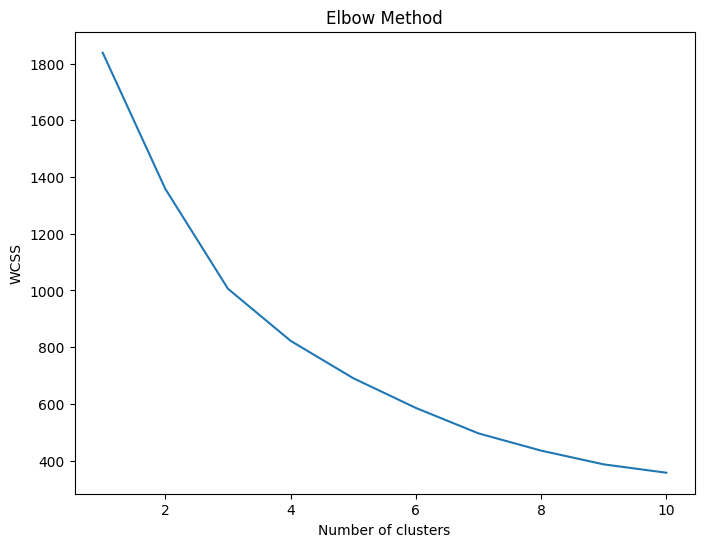

In [302]:
wcss = []
for i in range(1, 11): # Clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_model)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [303]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
wcss_table

,Number of Clusters,WCSS
0,1,1838.062222
1,2,1357.921919
2,3,1005.938854
3,4,822.409390
4,5,690.698659
5,6,585.817789
6,7,496.095972
7,8,435.311756
8,9,386.825189
9,10,357.382521


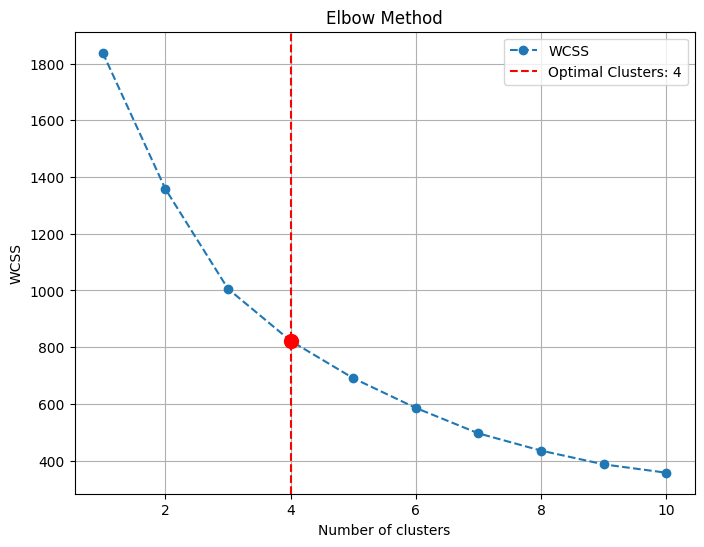

The optimal number of clusters is: 4


In [304]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5) # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [305]:
# Fit K-Means to the data with the optimal number of K cluster = 2
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_model)

# Add the cluster labels to the DataFrame
df['K-Means Cluster'] = clusters

# Show the df
df.head()

,Country,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Total Cases/1M Population,Total Deaths/1M Population,Death Percentage,K-Means Cluster
0,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743,0
1,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058,1
2,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216,0
3,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271,2
4,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438,0


## **Agglomerative Clustering**

In [306]:
df_model.head()

,Population,Total Cases,Total Deaths,Total Cases/1M Population,Total Deaths/1M Population,Death Percentage,Continent
0,0.038789,-0.276449,-0.204571,-0.915487,-0.759994,1.651243,1.0
1,-0.231774,-0.263220,-0.247798,-0.287081,0.099982,-0.097285,2.0
2,0.073154,-0.264347,-0.212815,-0.905275,-0.791845,0.657760,0.0
3,-0.251891,-0.295431,-0.282336,2.623123,0.736164,-0.611015,2.0
4,-0.003016,-0.287281,-0.264265,-0.926078,-0.873149,0.271204,0.0


Skipping Ward linkage with Manhattan metric (not supported).


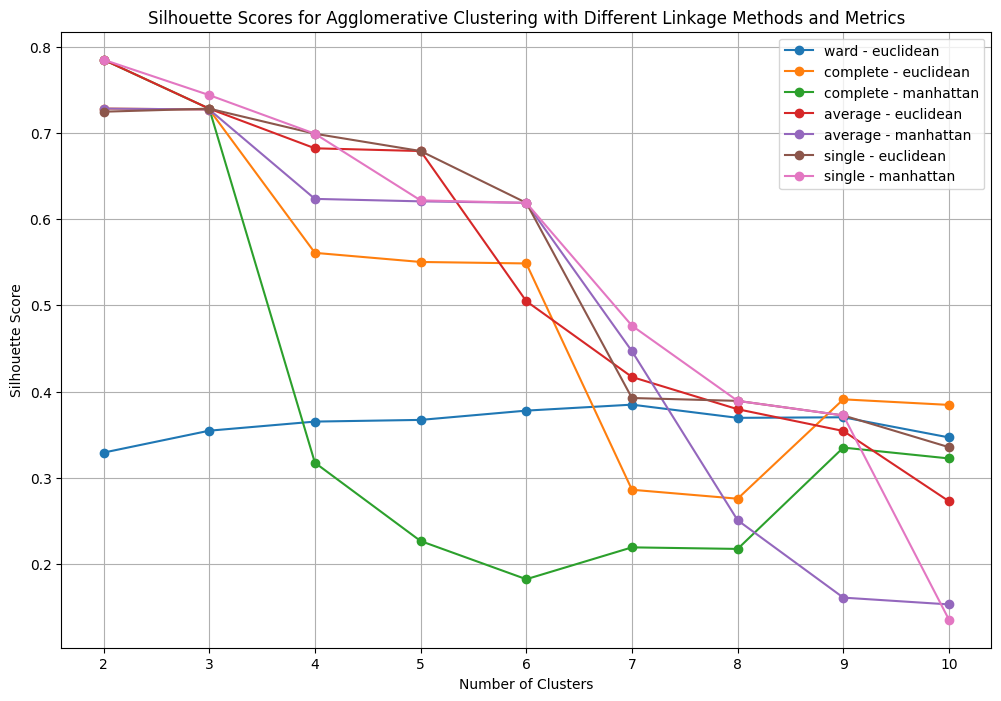

Best Silhouette Score: 0.7851185820031913
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: manhattan


In [307]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_model)
            silhouette_avg = silhouette_score(df_model, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

In [308]:
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_model)

# Add the cluster labels to the DataFrame
df['Hierarchical Cluster'] = y_hc

# Show the df
df.head()

,Country,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Total Cases/1M Population,Total Deaths/1M Population,Death Percentage,K-Means Cluster,Hierarchical Cluster
0,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743,0,0
1,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058,1,0
2,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216,0,0
3,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271,2,0
4,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438,0,0


# **Model Evaluation**

## **Silhouette Score**

In [309]:
# Calculate Silhouette Score for K-Means Clustering
silhouette_scaled = silhouette_score(df_model, df['K-Means Cluster'])
print(f"Silhouette Score for K-Means Cluster: {silhouette_scaled:.3f}")

# Calculate Silhouette Score for Agglomerative Clustering
silhouette_scaled = silhouette_score(df_model, df['Hierarchical Cluster'])
print(f"Silhouette Score for Hierarchical Cluster: {silhouette_scaled:.3f}")

Silhouette Score for K-Means Cluster: 0.379
Silhouette Score for Hierarchical Cluster: 0.785


## **Cluster Summary**

In [310]:
# Data summary for 'K-Means Cluster'
cluster_summary = df.groupby(clusters).agg({
    'Population': ['mean', 'median'],
    'Continent': ['first', 'count'],
    'Total Cases': ['mean', 'median'],
    'Total Deaths': ['mean', 'median'],
    'Total Cases/1M Population': ['mean', 'median'],
    'Total Deaths/1M Population': ['mean', 'median'],
    'Death Percentage': ['mean', 'median'],
    'K-Means Cluster': ['first', 'count']
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

Population                                     Continent        \
                 mean       median                             mode count   
cluster                                                                     
0        3.259339e+07   14498741.0                             Asia    94   
1        4.249622e+06     290302.0                           Europe    61   
2        1.781490e+07    4039250.5                           Europe    66   
3        8.481708e+08  869077489.0  Latin America and the Caribbean     4   

          Total Cases               Total Deaths            \
                 mean      median           mean    median   
cluster                                                      
0        7.773103e+05    132737.5   10390.989362    1946.0   
1        3.241949e+05     30549.0    3574.836066     311.0   
2        3.692578e+06   1121704.5   42219.606061    9879.0   
3        3.875566e+07  36514430.0  548629.250000  590828.5   

        Total Cases/1M Population           Total Deaths/1M Population  \
                             mean    median                       mean   
cluster                                                                  
0                    34826.670213   10159.5                 357.031915   
1                   110847.688525   95349.0                 932.442623   
2                   308367.757576  316176.5                2270.666667   
3                   103724.000000   85027.0                1614.250000   

                Death Percentage           K-Means Cluster        
         median             mean    median            mode count  
cluster                                                           
0         162.0         1.936186  1.329820               0    94  
1         871.0         1.053120  0.893277               1    61  
2        2156.5         1.076429  0.663266               2    66  
3        1693.0         1.910476  1.716434               3     4

In [311]:
# Data summary for 'Hierarchical Cluster'
cluster_summary = df.groupby(y_hc).agg({
    'Population': ['mean', 'median'],
    'Continent': ['first', 'count'],
    'Total Cases': ['mean', 'median'],
    'Total Deaths': ['mean', 'median'],
    'Total Cases/1M Population': ['mean', 'median'],
    'Total Deaths/1M Population': ['mean', 'median'],
    'Death Percentage': ['mean', 'median'],
    'K-Means Cluster': ['first', 'count']
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

Population                      Continent         Total Cases  \
                 mean       median              mode count          mean   
cluster                                                                    
0        3.373692e+07    5791800.0              Asia   224  1.829182e+06   
1        3.344006e+08  334400597.0  Northern America     1  8.183905e+07   

                     Total Deaths            Total Cases/1M Population  \
             median          mean     median                      mean   
cluster                                                                  
0          162753.0  2.306967e+04     1946.0             136418.973214   
1        81839052.0  1.008222e+06  1008222.0             244734.000000   

                  Total Deaths/1M Population         Death Percentage  \
           median                       mean  median             mean   
cluster                                                                 
0         88662.0                1088.151786   683.0         1.445072   
1        244734.0                3015.000000  3015.0         1.231957   

                  K-Means Cluster        
           median            mode count  
cluster                                  
0        1.027844               0   224  
1        1.231957               3     1

## **Cluster Visualization**

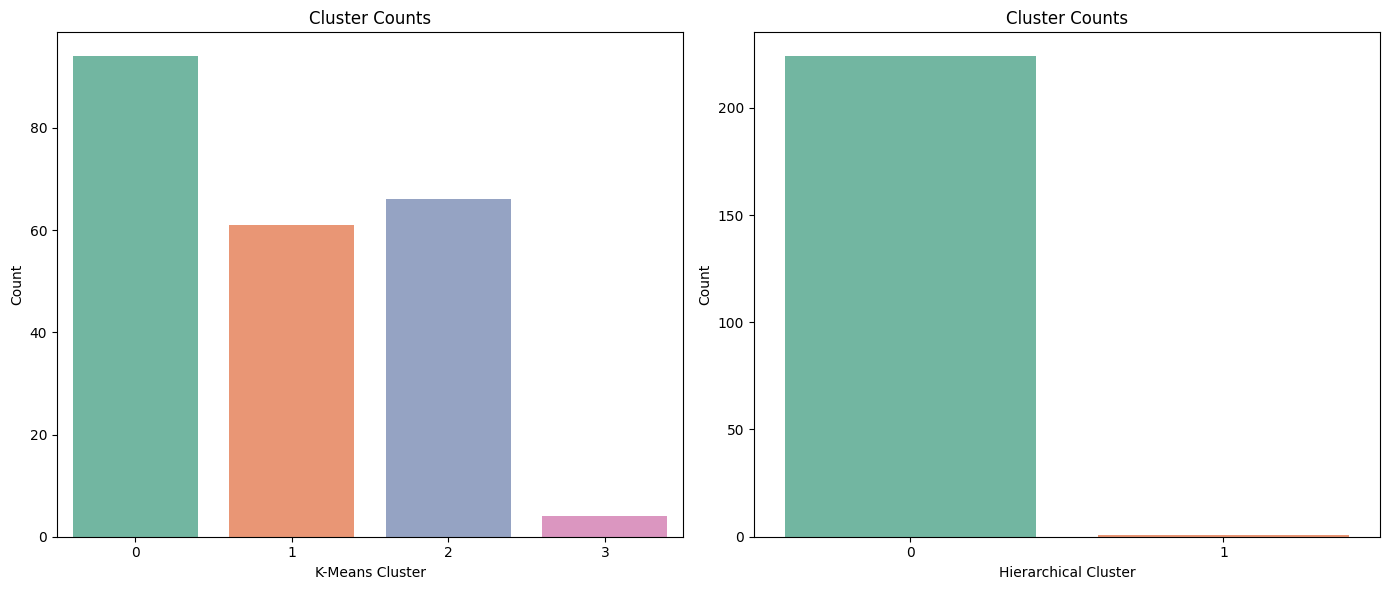

In [312]:
plt.figure(figsize=(14, 6))

# Scaled K-Means Clusters
plt.subplot(1, 2, 1)
sns.countplot(
    x='K-Means Cluster',
    hue='K-Means Cluster',
    data=df,
    palette='Set2',
    legend=False
)
plt.title('Cluster Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Count')

# Unscaled K-Means Clusters
plt.subplot(1, 2, 2)
sns.countplot(
    x='Hierarchical Cluster',
    hue='Hierarchical Cluster',
    data=df,
    palette='Set2',
    legend=False
)
plt.title('Cluster Counts')
plt.xlabel('Hierarchical Cluster')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [313]:
fig = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE",
    color="K-Means Cluster",  # Color by K-Means Cluster for better readability
    hover_name="Country",
    projection="natural earth",
    title="World Map of Countries by K-Means Cluster"
)

fig.show()

In [314]:
fig = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE",
    color="Hierarchical Cluster",  # Color by Hierarchical Cluster for better readability
    hover_name="Country",
    projection="natural earth",
    title="World Map of Countries by Hierarchical Cluster"
)

fig.show()

# **Cluster Profiling and Recommendations**

## **K-Means Cluster**

### **Cluster 0: Low-Burden / Potential Underreporting**
Profile:
*   Mostly Asian countries, largest cluster (94 countries).
*   Low total cases and low total deaths.
*   Very low deaths per million and low cases per million.
*   Death percentage ~1.9%, indicating either effective control or possible under-detection.

Government Policy Recommendations:
*   Increase testing capacity to verify whether low numbers are real or underreported.
*   Improve surveillance systems, including contact tracing and genomic monitoring.
*   Maintain preventive measures to avoid unnoticed silent spread.
*   Strengthen data transparency and reporting consistency.

### **Cluster 1: Small Population, High Incidence (Per Capita)**
Profile:
*   Mostly European countries; 61 countries.
*   Small populations (~4.2M).
*   High cases per million and high deaths per million relative to size.
*   Moderate total cases and deaths.

Government Policy Recommendations:
*   Implement targeted restrictions/NPI measures in high-transmission zones.
*   Enhance healthcare surge capacity, especially ICU beds in small-population countries.
*   Prioritize vaccination boosters for high-risk groups.
*   Improve outbreak early-warning systems due to vulnerability of small populations.

### **Cluster 2: High-Burden, High Transmission**
Profile:
*   Mixed regions; 66 countries.
*   High absolute total cases and total deaths.
*   Very high cases per million and high deaths per million.
*   Strong signs of entrenched community transmission.

Government Policy Recommendations:
*   Expand healthcare capacity: ICU units, oxygen supply, and staff surge programs.
*   Implement broad nationwide mitigation strategies (masking, distancing policies).
*   Accelerate vaccination coverage, including boosters.
*   Strengthen border controls and travel surveillance to prevent variant spread.

### **Cluster 3: Very Large Population, Severe Impact**
Profile:
*   Only 4 countries, primarily in Latin America & Caribbean.
*   Extremely large populations and very high total cases and total deaths.
*   High death percentage (~1.9%) and high deaths per million.
*   Indicates overwhelmed healthcare systems and prolonged outbreaks.

Government Policy Recommendations:
*   Immediate international support: medical supplies, oxygen, critical-care assistance.
*   Accelerate mass vaccination and regional mobile vaccination units.
*   Invest heavily in healthcare system rebuilding and long-term pandemic resilience.
*   Implement strong nationwide NPIs to control ongoing severe outbreaks.

## **Hierarchical Cluster**

### **Cluster 0: Moderate-Population Asian Countries with Mid-Level COVID Burden**
Profile:
*   Consists mostly of Asian countries (mode = Asia) with moderate population sizes (mean ≈ 33 million).
*   Shows moderate total cases (mean ≈ 1.83 million) but relatively low median, indicating uneven distribution (some countries highly affected, many mildly affected).
*   Death percentage (~1.45%) indicates a medium fatality rate similar to global averages.
*   Large cluster size (224 countries) shows strong internal variation.

Government Policy Recommendations:
*   Strengthen surveillance and variant monitoring, especially in countries with below-median case detection.
*   Expand vaccination boosters for vulnerable groups to prevent spikes in high-density areas.
*   Improve healthcare capacity in countries with higher-than-average deaths per million.
*   Share best practices regionally, as Asia shows diverse outcomes—successful strategies should be replicated cross-country.
*   Enhance testing & reporting accuracy, especially for countries far below mean cases, where under-reporting is likely.

### **Cluster 1: Single High-Burden North American Outlier**
Profile:
*   Contains only 1 country (mode = Northern America).
*   Extremely large population (≈ 334 million).
*   Very high total cases and deaths—far above global averages (Total cases ≈ 81 million, total deaths ≈ 1 million)
*   Highest cases per million (244,734) indicating widespread transmission.
*   Deaths per million extremely high (3015), far above Cluster 0.
*   Death percentage (~1.23%) slightly lower than Cluster 0, meaning fatality severity is high in scale but not proportion.

Government Policy Recommendations:
*   Reinforce national-level epidemic preparedness, including surge capacity for ICUs and emergency staffing.
*   Improve crisis communication and public compliance, as high spread indicates behavioral or policy gaps.
*   Invest in long-term pandemic resilience, including stockpiles, localized outbreak response units, and stronger public health infrastructure.
*   Target misinformation and vaccine hesitancy, which often affect transmission levels in high-population democracies.
*   Mandate strategic boosters for high-risk groups due to persistent large-scale transmission potential.

# **Best Model**

Although Hierarchical Clustering shows a higher silhouette score (0.785), it does not produce a meaningful segmentation because one of its clusters contains only a single data point, making the model poorly balanced and not useful for interpretation. The high silhouette score mainly reflects that this lone point is far away from the other cluster, but it does not guarantee that the model is the best.

In contrast, K-Means, despite its lower silhouette score (0.379), provides a more reasonable and interpretable segmentation. The clusters are better distributed, contain meaningful group sizes, and offer clearer insights.

Therefore, **K-Means is the better model** based on overall clustering quality and practical usability.